# Case Study: Which IPO to Buy? 
Select using Logistic Regression
[COMP20121 Machine Learning for Data Analytics](https://sites.google.com/site/hejunhomepage/Teaching/machine-learning-for-data-analytics)

Author: Jun He 

|<img src ="https://news.tradimo.com/wp-content/uploads/2020/01/GettyImages-1045262938-d6e77886128f4b05b3b4b4e3daef781a-1536x1024.jpg" width =300>|
|:--:|
|[IPO](https://news.tradimo.com/wp-content/uploads/2020/01/GettyImages-1045262938-d6e77886128f4b05b3b4b4e3daef781a.jpg)|

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt  

### Learning Objectives
1. Develop  an ML project for selecting IPO based on the real-world data by CRISP-DM
1. Read Excel spreadsheet and convert float date to the normal format
1. Add useful new project-specific features    
1. Evaluate the model performance using a project-specific measurement

### Lecture materials  
* The materials of this lecture is based on the book: Combs, A., & Roman, M. (2019). [Python Machine Learning Blueprints.](https://www.packtpub.com/gb/big-data-and-business-intelligence/python-machine-learning-blueprints-second-edition) Packt Publishing Ltd. Second edition. 
* The code of this project is available at Github via searching the book name "Python Machine Learning Blueprints"

## Part 1 Business Understanding
### What is IPO?
* **Initial public offering (IPO)**  is the process that transfers a private company into a public one. 
* A company gets funding from public through purchasing its shares. 
* One or more investment banks help underwrite the offering 
* The banks make a guarantee to the company that they will purchase all of the shares being offered at the IPO price on the day of the IPO. 
* The underwriters do not intend to keep all of the shares themselves. So, the banks  takes a roadshow to attract interest from institutional clients 
* These clients put in a subscription for the shares, which indicates their interest in buying shares on the day of the IPO. 
* A non-binding contract, as the price of the offering is not finalized until the day of the IPO.  
*  underwriter set the **offer price** based on the level of interest expressed 

### Business goal of This project
* For institution clients,  **their return**  is the difference between the  **offering price**  of shares and the first day's  **closing price** 
* For general public, their return is the difference between the   **opening price**  on the first day (typically higher than the  **offering price**  to institutional clients) and sales it at the end of the day.   
* As public, we use ML to help decide 
    1. which IPOs are worth a closer look:  buy
    1. which ones we may want to take a pass on: not buy
* This is a binary classification problem

* The price of some IPOs may rise over 100\% on the first day of trading such as
    * Seres Therapeutics up 185\%, 06/26/15
    * Audro Biotech up 147\%, 4/15/15
    * Shake Shack up 118\%, 1/30/15

## Part 2 Data understanding  
### IPO Data
* IPO Data comes from IPOScoop.com, which  provides a service of ratings upcoming IPOs. 
* The IPO data from 2000 to present is downloaded from the website https://www.iposcoop.com/scoop-track-record-from-2000-to-present/. 
* The data file `SCOOP-Rating-Performance.xls` is an  **Excel spreadsheet** 
* Read the data (spread sheet) find the spreadsheet consists of both summary and data

###  Read Excel Data 
* Pandas function `read_csv()` cannot be used to read Excel data.
* Use   `xlrd`  library  to read Excel files into Python lists 

In [5]:
#!pip install xlrd #install a library if it does not exist 
import xlrd 

* Loaded the entire Excel workbook
* `lrd.open_workbook` method: open a spreadsheet file for data extraction and return a `Book` objective.

In [6]:
import requests 
import urllib
url = "https://www.iposcoop.com/wp-content/uploads/2013/11/SCOOP-Rating-Performance.xls"
# in Kaggle settings, Internet option must be On for accessing this online data set  
file_name, headers = urllib.request.urlretrieve(url)
print (file_name)
wb = xlrd.open_workbook(file_name)
print (wb)

C:\Users\Bobby\AppData\Local\Temp\tmpht11vn3i


* In this project, we only need the spreadsheet by the first index
* Function `sheet_by_index` return a Sheet by the assigned index.
* Dsiplay first 40 rows

In [7]:
ws = wb.sheet_by_index(0)
for i in range(40):
    print(i, ws.row(i))

0 [empty:'', empty:'', empty:'', text:'IPO SCOOP Rating Scorecard', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'']
1 [empty:'', empty:'', empty:'', text:'(First published online in May 2000)', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'']
2 [empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'']
3 [text:'Year', text:'IPOs Priced', text:'Calls', text:'On Target', empty:'', text:'Batting Average', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'']
4 [number:2020.0, number:205.0, number:198.0, number:180.0, number:18.0, number:0.9090909090909091, empty:'', empty:'', empty:'', empty:'', empty:'', empty:'']
5 [number:2019.0, number:231.0, number:207.0, number:186.0, number:21.0, number:0.8985507246376812, empty:'', empty:'', empty:'', empty:'', empty:'', empty:'']
6 [number:2018.0, number:228.0, number:223.0, number:191.0, number:32.0, number:0.8565022

### Keep only related data
* Skip over the summary data in the sheet     
* Incorporate the data  only row by row  from line 37.
* We are only interested in those rows in the sheet that start with a date. 
* If the first first column is in a float format, then the row is with a date. 
* Loop over each row in the spreadsheet, checking whether the first value is a float. If it is, then we add all the cells' values to the list `ipo_list`. 
* `isinstance` function: returns `True` if the specified object is of the specified type (`float` in the code), otherwise `False`

In [8]:
ipo_list = []
for i in range(37,ws.nrows):
    if isinstance(ws.row(i)[0].value, float):
        ipo_list.append([x.value for x in ws.row(i)])
    else:
        print(i, ws.row(i))

242 [empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'']
243 [empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'']
244 [text:'Trade', empty:'', empty:'', text:'Lead/Joint-Lead', text:'Offer', text:'Opening', text:'1st Day', text:'1st Day', text:'$ Change', text:'$ Change', text:'Star', empty:'']
245 [text:'Date', text:'Issuer', text:'Symbol', text:' Managers', text:'Price', text:'Price', text:'Close', text:'% Px Chng ', text:'Opening', text:'Close', text:'Ratings', text:'Performed']
246 [empty:'', number:2019.0, empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'']
468 [empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'']
469 [empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'

In [9]:
len(ipo_list)

3632

### Working on the DataFrame
* We use dataframes in data analysis
* Generate a DataFrame from the list
* Add column names. Column names come from orinignal data.

In [10]:
df = pd.DataFrame(ipo_list)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11
0,43847.0,I-Mab,IMAB,Jefferies/ CICC,14.0,14.75,12.75,-0.089286,0.75,-1.25,2.0,
1,43847.0,LIZHI,LIZI,Credit Suisse/ Citigroup,11.0,11.03,11.63,0.057273,0.03,0.63,1.0,
2,43847.0,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.5,13.50,13.50,0.0,0.00,0.00,1.0,
3,43847.0,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.0,13.85,13.51,0.039231,0.85,0.51,1.0,
4,43854.0,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.0,10.52,10.45,0.045,0.52,0.45,1.0,
5,43854.0,SCVX Corp.,SCVXU,Credit Suisse,10.0,10.30,10.32,0.032,0.30,0.32,1.0,
6,43858.0,AnPac Bio-Medical Science,ANPC,WestPark Capital,12.0,12.00,11.25,-0.0625,0.00,-0.75,1.0,
7,43859.0,Annovis Bio,ANVS,ThinkEquity (a division of Fordham Financial M...,6.0,6.63,9.59,0.598333,0.63,3.59,1.0,Missed
8,43859.0,Black Diamond Therapeutics,BDTX,J.P. Morgan/ Jefferies/ Cowen,19.0,33.00,39.48,1.077895,14.00,20.48,3.0,
9,43861.0,1Life Healthcare,OWEM,J.P. Morgan/ Morgan Stanley,14.0,18.00,22.07,0.576429,4.00,8.07,2.0,


In [11]:
df.columns = ['Date', 'Company', 'Ticker', 'Managers', \
              'Offer Price', 'Opening Price', '1st Day Close',\
              '1st Day % Chg', '$ Chg Open', '$ Chg Close',\
              'Star Rating', 'Performed']
df.head(5)

,Date,Company,Ticker,Managers,Offer Price,Opening Price,1st Day Close,1st Day % Chg,$ Chg Open,$ Chg Close,Star Rating,Performed
0,43847.0,I-Mab,IMAB,Jefferies/ CICC,14.0,14.75,12.75,-0.089286,0.75,-1.25,2.0,
1,43847.0,LIZHI,LIZI,Credit Suisse/ Citigroup,11.0,11.03,11.63,0.057273,0.03,0.63,1.0,
2,43847.0,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.5,13.50,13.50,0.0,0.00,0.00,1.0,
3,43847.0,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.0,13.85,13.51,0.039231,0.85,0.51,1.0,
4,43854.0,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.0,10.52,10.45,0.045,0.52,0.45,1.0,


### Handle date  
* The date type in the spreadsheet is `float` which must be converted  to a proper date in the analysis. 
* Function `xlrd.xldate.xldate_as_datetime(xldate, datemode)`: convert an Excel date/time number into a datetime.datetime object.
* `dataframe[column].apply`: Apply a function along an axis of the DataFrame and return Result of applying func along the given axis of the DataFrame. 

In [12]:
def to_date(x):
    return xlrd.xldate.xldate_as_datetime(x, wb.datemode)
df['Date'] = df['Date'].apply(to_date)
df.head(5)

,Date,Company,Ticker,Managers,Offer Price,Opening Price,1st Day Close,1st Day % Chg,$ Chg Open,$ Chg Close,Star Rating,Performed
0,2020-01-17,I-Mab,IMAB,Jefferies/ CICC,14.0,14.75,12.75,-0.089286,0.75,-1.25,2.0,
1,2020-01-17,LIZHI,LIZI,Credit Suisse/ Citigroup,11.0,11.03,11.63,0.057273,0.03,0.63,1.0,
2,2020-01-17,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.5,13.50,13.50,0.0,0.00,0.00,1.0,
3,2020-01-17,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.0,13.85,13.51,0.039231,0.85,0.51,1.0,
4,2020-01-24,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.0,10.52,10.45,0.045,0.52,0.45,1.0,


* Add  additional date-related columns for the sake of analysis

In [13]:
df['Year'], df['Month'], df['Day'], df['Day of Week'] = \
df['Date'].dt.year, df['Date'].dt.month, df['Date'].dt.day, df['Date'].dt.weekday
df.head(5)

,Date,Company,Ticker,Managers,Offer Price,Opening Price,1st Day Close,1st Day % Chg,$ Chg Open,$ Chg Close,Star Rating,Performed,Year,Month,Day,Day of Week
0,2020-01-17,I-Mab,IMAB,Jefferies/ CICC,14.0,14.75,12.75,-0.089286,0.75,-1.25,2.0,,2020,1,17,4
1,2020-01-17,LIZHI,LIZI,Credit Suisse/ Citigroup,11.0,11.03,11.63,0.057273,0.03,0.63,1.0,,2020,1,17,4
2,2020-01-17,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.5,13.50,13.50,0.0,0.00,0.00,1.0,,2020,1,17,4
3,2020-01-17,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.0,13.85,13.51,0.039231,0.85,0.51,1.0,,2020,1,17,4
4,2020-01-24,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.0,10.52,10.45,0.045,0.52,0.45,1.0,,2020,1,24,4


### Drop unimportant data
* We have no interest in penny stocks, or particularly low-priced stocks: `['Offer Price'] < 5`
* Drop them and reset index of the Dataframe
* `inplace=True` returns None, `inplace=False` returns a copy of the object with the operation performed 

In [14]:
df[df['Offer Price'] < 5].index

Int64Index([  30,  205,  245,  338,  398,  404,  455,  461,  464,  532,  561,
             767,  855,  873, 1232, 1534, 1688, 1741, 1812, 1908, 1924, 1968,
            1979, 2006, 2052, 2054, 2078, 2641, 3145, 3380],
           dtype='int64')

In [15]:
df.drop(df[df['Offer Price'] < 5].index, inplace=True)

In [16]:
df.reset_index(drop=True, inplace=True)

### Check data type
* We check whether data types  are proper.    
* For example, the column `1st Day %Chg` column represents the change  of IPO (numerical) on the first day but its data type is an object.  
* Change its data type to a float
* `astype function`: Cast a Pandas object to a specified dtype 

In [17]:
df.dtypes
#print(df.dtypes.to_latex())

Date             datetime64[ns]
Company                  object
Ticker                   object
Managers                 object
Offer Price             float64
Opening Price           float64
1st Day Close           float64
1st Day % Chg            object
$ Chg Open              float64
$ Chg Close             float64
Star Rating              object
Performed                object
Year                      int64
Month                     int64
Day                       int64
Day of Week               int64
dtype: object

In [18]:
df['1st Day % Chg'] = df['1st Day % Chg'].astype(float)

In [19]:
df.dtypes

Date             datetime64[ns]
Company                  object
Ticker                   object
Managers                 object
Offer Price             float64
Opening Price           float64
1st Day Close           float64
1st Day % Chg           float64
$ Chg Open              float64
$ Chg Close             float64
Star Rating              object
Performed                object
Year                      int64
Month                     int64
Day                       int64
Day of Week               int64
dtype: object

### Number of IPOs
* Exploratory analysis by plotiing the number of IPOs since 2000
* `by_year_cnt`: records the count of tickers via `groupby`
* `dataframe.plot(kind=’bar’)` is a Pandas built-in plot method.


Text(0.5, 1.02, 'IPO Count by Year')

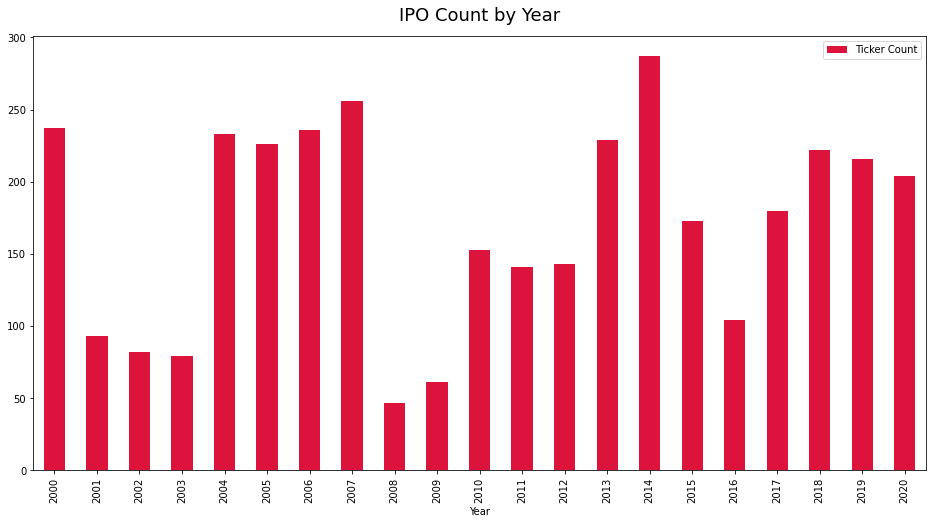

In [20]:
by_year_cnt = df.groupby('Year')[['Ticker']].count()
fig, ax = plt.subplots(figsize=(16,8))
by_year_cnt.plot(kind='bar', ax=ax, color='crimson')
ax.legend(['Ticker Count'])
ax.set_title('IPO Count by Year', fontdict={'size': 18}, y=1.02)

### Summarize the performance of the the IPO in each year
* Function `describe()`:   Generate descriptive statistics that summarize of the data
* for example, in 2000
    * count: 237 IPOs 
    * mean: the mean price of IPOs increase 35\% in the first day
    * min: the worst IPO with -26\% price drop
    * 50\%: 50\% IPOs with at least 16\% price increase 

In [21]:
summary_by_year = df.groupby('Year')['1st Day % Chg'].describe()
summary_by_year

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2000,237.0,0.355621,0.557065,-0.269231,0.004464,0.162500,0.470052,2.775000
2001,93.0,0.130180,0.160606,-0.140625,0.011538,0.088542,0.229167,0.766667
2002,82.0,0.072315,0.141903,-0.330769,0.000000,0.045959,0.135866,0.666667
2003,79.0,0.120958,0.164613,-0.155455,0.002857,0.074286,0.230264,0.885556
2004,233.0,0.107347,0.165334,-0.142500,0.000000,0.052083,0.169231,1.036364
2005,226.0,0.099110,0.274405,-0.164000,0.000000,0.025357,0.143803,3.538519
2006,236.0,0.099694,0.176282,-0.295455,0.000000,0.041652,0.150852,1.254068
2007,256.0,0.115215,0.206049,-0.269091,0.000000,0.033571,0.179853,0.972222
2008,47.0,0.023182,0.134953,-0.199200,-0.034857,0.000000,0.028873,0.575000


### Understand the change of the IPO on the first day
* Plot the mean  change of the IPO on the first day


Text(0.5, 1.02, 'Mean First Day Percentage Change by Year')

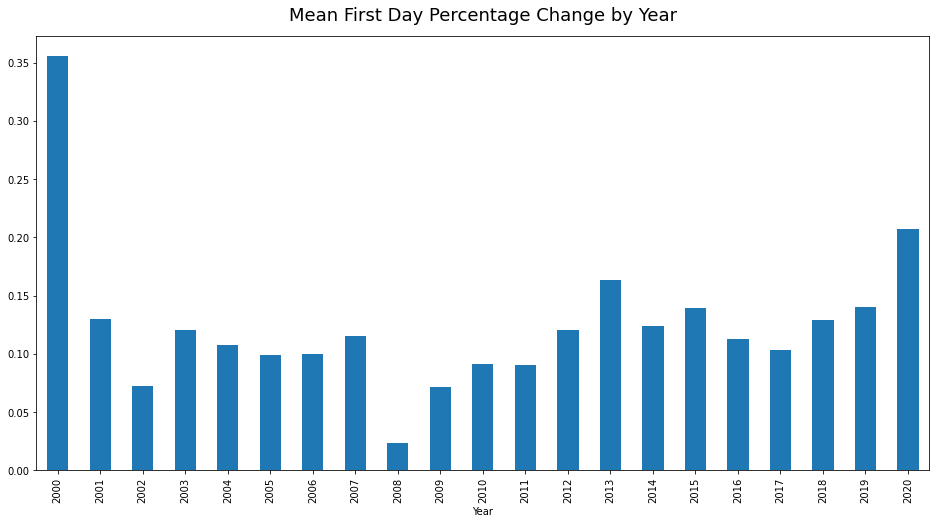

In [22]:
fig, ax = plt.subplots(figsize=(16,8))
summary_by_year['mean'].plot(kind='bar', ax=ax)
ax.set_title('Mean First Day Percentage Change by Year', fontdict={'size': 18}, y=1.02)
#fig.savefig('eda-ipochg.png')

### Part 3 Understand Features and Add New Features
### Understand Features 
* What might impact the performance of an offering as it begins trading? 
    * Perhaps the performance of the market in general or the prestige of the underwriters could impact it? 
    * Perhaps the day of the week or the month that it trades is important?
* Consideration and inclusion of these factors is as important as the data in building up a good model

### Add New Feature: First-day return to the public in percentage
* Only investors get the offering price 
* Suppose that public bought one share of IPO at the exact opening tick and sold them at the precise closing price
* What is the return at the end of the day?
* The `first-day return` to the general public is the difference between the opening price and the closing price.
* Add  a column for the change between the opening price and theclosing price

In [23]:
df['1st Day Open to Close % Chg'] = ((df['1st Day Close'] - df['Opening Price'])/df['Opening Price'])
df.head(5)

,Date,Company,Ticker,Managers,Offer Price,Opening Price,1st Day Close,1st Day % Chg,$ Chg Open,$ Chg Close,Star Rating,Performed,Year,Month,Day,Day of Week,1st Day Open to Close % Chg
0,2020-01-17,I-Mab,IMAB,Jefferies/ CICC,14.0,14.75,12.75,-0.089286,0.75,-1.25,2.0,,2020,1,17,4,-0.135593
1,2020-01-17,LIZHI,LIZI,Credit Suisse/ Citigroup,11.0,11.03,11.63,0.057273,0.03,0.63,1.0,,2020,1,17,4,0.054397
2,2020-01-17,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.5,13.50,13.50,0.000000,0.00,0.00,1.0,,2020,1,17,4,0.000000
3,2020-01-17,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.0,13.85,13.51,0.039231,0.85,0.51,1.0,,2020,1,17,4,-0.024549
4,2020-01-24,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.0,10.52,10.45,0.045000,0.52,0.45,1.0,,2020,1,24,4,-0.006654


* Describe the new feature

In [24]:
df['1st Day Open to Close % Chg'].describe()

count    3602.000000
mean        0.013316
std         0.115647
min        -0.492812
25%        -0.028618
50%         0.000000
75%         0.038282
max         2.173653
Name: 1st Day Open to Close % Chg, dtype: float64

### Plot the first-day return
* Plot the first-day return that the general public by years

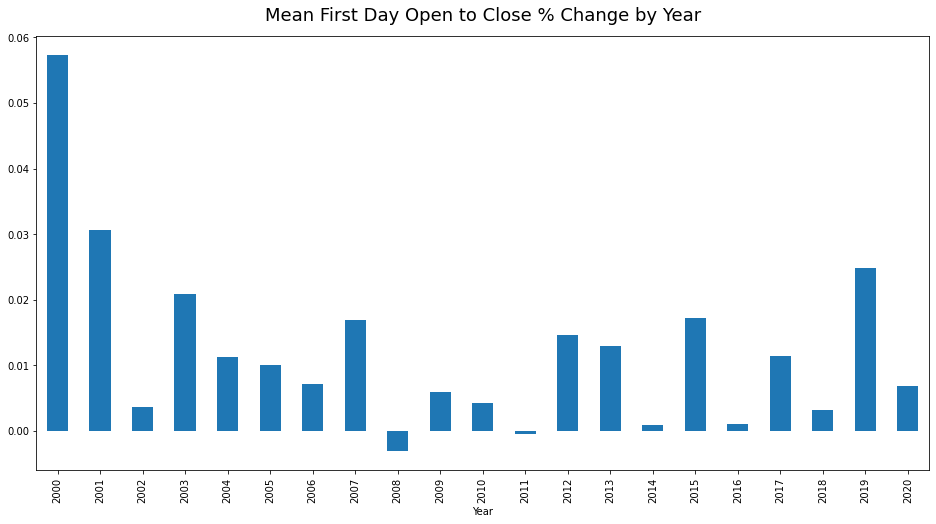

In [25]:
fig, ax = plt.subplots(figsize=(16,8))
df.groupby('Year')['1st Day Open to Close % Chg'].mean().plot(kind='bar', ax=ax)
ax.set_title('Mean First Day Open to Close % Change by Year', fontdict={'size': 18}, y=1.02)
fig.savefig('eda-ipochg-public.pdf')

* This return is much lower than the difference between the offeringprice and closing price

### Calculate the first-day return (%)
* calculate the first-day return that the general public by years
* Sort them in the order from high to low `ascending=False`

In [26]:
mean_delta_by_year = df.groupby('Year')[['1st Day Open to Close % Chg']].mean()

In [27]:
mean_delta_by_year.sort_values(ascending=False, by='1st Day Open to Close % Chg')

,1st Day Open to Close % Chg
Year,
2000,0.057282
2001,0.030659
2019,0.024807
2003,0.020931
2015,0.017152
2007,0.016880
2012,0.014646
2013,0.012897
2017,0.011418


### Add New Feature:  `First-day return` to the public in dollar
* Add another column:  `1st Day Open to Close $ Chg` = 1st day close price - opening price
* Add one column for  the actual dollar price change from open to close 
* Let's look at Year 2010 statistics 

In [28]:
df['1st Day Open to Close $ Chg'] = (df['1st Day Close'] - df['Opening Price'])
df[df['Year']==2000]['1st Day Open to Close $ Chg'].describe()

count    237.000000
mean       1.160931
std        4.153788
min      -15.875000
25%       -0.359375
50%        0.312500
75%        1.875000
max       20.609375
Name: 1st Day Open to Close $ Chg, dtype: float64

### Distribution of first day returns for IPOs in 2000
*  Plot the distribution of return
* `datafram.plot`: dataframe built-in method

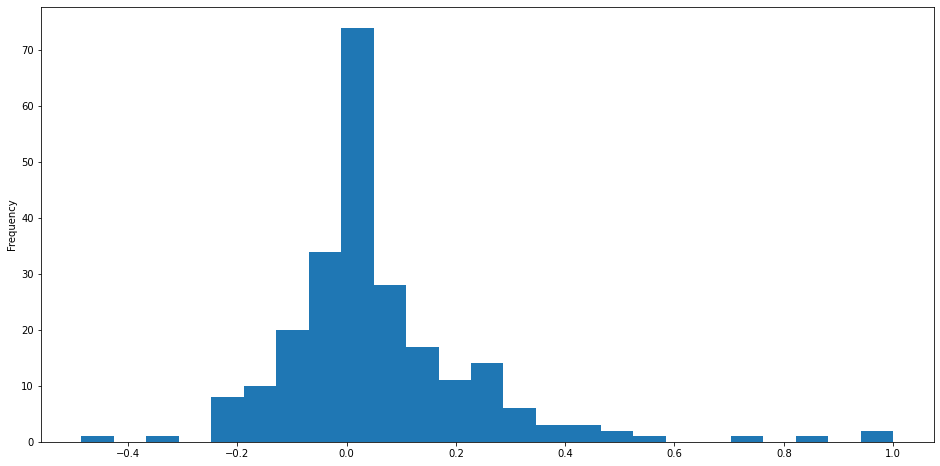

In [29]:
fig, ax = plt.subplots(figsize=(16,8))
df[df['Year']==2000]['1st Day Open to Close % Chg'].plot(kind='hist', bins=25, ax=ax)
fig.savefig("eda-distribution.png")

### IPO stratgegy
* The returns are centered around zero, but some exceptional returns are on the right
* Strategy: select   these exceptional IPOs for better returns 
* Show these exceptional IPOs: `'1st Day Open to Close % Chg']`>=20%

In [30]:
df[(df['Year']==2000)&(df['1st Day Open to Close % Chg']>=.2)]

,Date,Company,Ticker,Managers,Offer Price,Opening Price,1st Day Close,1st Day % Chg,$ Chg Open,$ Chg Close,Star Rating,Performed,Year,Month,Day,Day of Week,1st Day Open to Close % Chg,1st Day Open to Close $ Chg
3368,2000-05-18,iBEAM Broadcasting,IBEM,Morgan Stanley Dean Witter,10.00,11.500000,14.000000,0.400000,1.500000,4.000000,2.0,,2000,5,18,3,0.217391,2.500000
3369,2000-05-18,New Focus,NUFO,Credit Suisse First Boston,20.00,40.000000,51.000000,1.550000,20.000000,31.000000,3.0,,2000,5,18,3,0.275000,11.000000
3377,2000-05-25,Sonus Networks,SONS,"Goldman, Sachs",23.00,32.000000,50.500000,1.195652,9.000000,27.500000,4.0,,2000,5,25,3,0.578125,18.500000
3393,2000-06-21,Cepheid,CPHD,UBS Warburg,6.00,6.250000,9.000000,0.500000,0.250000,3.000000,1.0,,2000,6,21,2,0.440000,2.750000
3397,2000-06-23,Accelerated Networks,ACCL,Credit Suisse First Boston,15.00,33.000000,47.875000,2.191667,18.000000,32.875000,2.0,,2000,6,23,4,0.450758,14.875000
3401,2000-06-27,Click Commerce,CKCM,Morgan Stanley Dean Witter,10.00,14.000000,17.625000,0.762500,4.000000,7.625000,3.0,,2000,6,27,1,0.258929,3.625000
3407,2000-06-29,CapStone Turbine,CPST,"Goldman, Sachs",16.00,27.375000,47.984375,1.999023,11.375000,31.984375,2.0,,2000,6,29,3,0.752854,20.609375
3413,2000-06-30,Precise Software Soluntions,PRSE,Merrill Lynch,16.00,18.750000,24.000000,0.500000,2.750000,8.000000,3.0,,2000,6,30,4,0.280000,5.250000
3415,2000-07-07,InfoVista SA,IVTA,Lehman Brothers,12.23,15.500000,30.500000,1.493868,3.270000,18.270000,3.0,,2000,7,7,4,0.967742,15.000000
3422,2000-07-13,I-Many,IMNY,Robertson Stephens,9.00,9.031250,12.484375,0.387153,0.031250,3.484375,2.0,,2000,7,13,3,0.382353,3.453125


### Adding new features:  `'Opening Gap % Chg' and 'Opening Gap $ Chg'` 
* One  informative measure is the opening gap, which is the difference between the offer price and the opening price of the issue
* Add   columns called  `'Opening Gap % Chg'` and `'Opening Gap $ Chg'`

In [31]:
df['Opening Gap % Chg'] = (df['Opening Price'] - df['Offer Price'])/df['Offer Price']
df.head(5)

,Date,Company,Ticker,Managers,Offer Price,Opening Price,1st Day Close,1st Day % Chg,$ Chg Open,$ Chg Close,Star Rating,Performed,Year,Month,Day,Day of Week,1st Day Open to Close % Chg,1st Day Open to Close $ Chg,Opening Gap % Chg
0,2020-01-17,I-Mab,IMAB,Jefferies/ CICC,14.0,14.75,12.75,-0.089286,0.75,-1.25,2.0,,2020,1,17,4,-0.135593,-2.00,0.053571
1,2020-01-17,LIZHI,LIZI,Credit Suisse/ Citigroup,11.0,11.03,11.63,0.057273,0.03,0.63,1.0,,2020,1,17,4,0.054397,0.60,0.002727
2,2020-01-17,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.5,13.50,13.50,0.000000,0.00,0.00,1.0,,2020,1,17,4,0.000000,0.00,0.000000
3,2020-01-17,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.0,13.85,13.51,0.039231,0.85,0.51,1.0,,2020,1,17,4,-0.024549,-0.34,0.065385
4,2020-01-24,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.0,10.52,10.45,0.045000,0.52,0.45,1.0,,2020,1,24,4,-0.006654,-0.07,0.052000


In [32]:
df['Opening Gap $ Chg'] = (df['Opening Price'] - df['Offer Price'])
df.head(5)

,Date,Company,Ticker,Managers,Offer Price,Opening Price,1st Day Close,1st Day % Chg,$ Chg Open,$ Chg Close,Star Rating,Performed,Year,Month,Day,Day of Week,1st Day Open to Close % Chg,1st Day Open to Close $ Chg,Opening Gap % Chg,Opening Gap $ Chg
0,2020-01-17,I-Mab,IMAB,Jefferies/ CICC,14.0,14.75,12.75,-0.089286,0.75,-1.25,2.0,,2020,1,17,4,-0.135593,-2.00,0.053571,0.75
1,2020-01-17,LIZHI,LIZI,Credit Suisse/ Citigroup,11.0,11.03,11.63,0.057273,0.03,0.63,1.0,,2020,1,17,4,0.054397,0.60,0.002727,0.03
2,2020-01-17,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.5,13.50,13.50,0.000000,0.00,0.00,1.0,,2020,1,17,4,0.000000,0.00,0.000000,0.00
3,2020-01-17,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.0,13.85,13.51,0.039231,0.85,0.51,1.0,,2020,1,17,4,-0.024549,-0.34,0.065385,0.85
4,2020-01-24,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.0,10.52,10.45,0.045000,0.52,0.45,1.0,,2020,1,24,4,-0.006654,-0.07,0.052000,0.52


### Adding features to influence the performance of an IPO:  `'Mgr Count'` 
* Perhaps having more banks (managers) involved leads to better marketing of the issue?
* Add one column called`'Mgr Count'`
*  `apply` function:  Apply a function along an axis of the DataFrame, return Series or DataFrame

In [33]:
def get_mgr_count(x):
    return len(x.split('/'))

In [34]:
df['Mgr Count'] = df['Managers'].apply(get_mgr_count)
df.head(5)

,Date,Company,Ticker,Managers,Offer Price,Opening Price,1st Day Close,1st Day % Chg,$ Chg Open,$ Chg Close,...,Performed,Year,Month,Day,Day of Week,1st Day Open to Close % Chg,1st Day Open to Close $ Chg,Opening Gap % Chg,Opening Gap $ Chg,Mgr Count
0,2020-01-17,I-Mab,IMAB,Jefferies/ CICC,14.0,14.75,12.75,-0.089286,0.75,-1.25,...,,2020,1,17,4,-0.135593,-2.00,0.053571,0.75,2
1,2020-01-17,LIZHI,LIZI,Credit Suisse/ Citigroup,11.0,11.03,11.63,0.057273,0.03,0.63,...,,2020,1,17,4,0.054397,0.60,0.002727,0.03,2
2,2020-01-17,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.5,13.50,13.50,0.000000,0.00,0.00,...,,2020,1,17,4,0.000000,0.00,0.000000,0.00,3
3,2020-01-17,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.0,13.85,13.51,0.039231,0.85,0.51,...,,2020,1,17,4,-0.024549,-0.34,0.065385,0.85,3
4,2020-01-24,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.0,10.52,10.45,0.045000,0.52,0.45,...,,2020,1,24,4,-0.006654,-0.07,0.052000,0.52,1


### Count `'Mgr Count'`  
* Group `'1st Day Open to Close % Chg'` by `'Mgr Count'`
* `to_frame()`: Convert Series to DataFrame.

In [35]:
df.groupby('Mgr Count')['1st Day Open to Close % Chg'].count().to_frame()

,1st Day Open to Close % Chg
Mgr Count,
1,1117
2,1418
3,684
4,234
5,69
6,36
7,12
8,11
9,8


### Understand the relationship between `'1st Day Open to Close % Chg'` group by `'Mgr Count'`
* Plot the mean of `'1st Day Open to Close % Chg'` group by `'Mgr Count'`
* `DataFrame.style` method: for formatting and displaying DataFrames.

<AxesSubplot:ylabel='Mgr Count'>

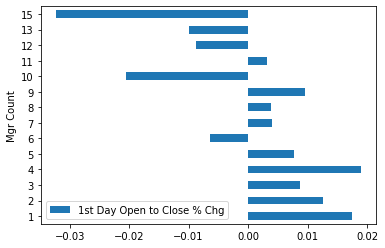

In [36]:
df.groupby('Mgr Count')['1st Day Open to Close % Chg'].mean().to_frame().plot.barh()

### Adding new feature: `'Lead Mgr'`
* Perhaps the first underwriter (the lead) and the prestige of this bank is important to the first-day gains
* Extract the lead from `Managers`
    * [0] for the first, "/" splits names in the spreadsheet 
    * lambda function: (lambda arguments : expression) the expression is executed and the result is returned

In [37]:
df['Lead Mgr'] = df['Managers'].apply(lambda x: x.split('/')[0])

* Check each unique lead manager’ name
* `unique()` function lists unique values in a dataframe column

In [38]:
df['Lead Mgr'].unique()

array(['Jefferies', 'Credit Suisse', 'Citigroup',
       'Wells Fargo Securities', 'Deutsche Bank Securities',
       'WestPark Capital',
       'ThinkEquity (a division of Fordham Financial Management )',
       'J.P. Morgan', 'Goldman Sachs', 'EarlyBirdCapital',
       'Morgan Stanley', 'Barclays', 'Raymond James', 'Stephens',
       'Imperial Capital', 'Maxim Group LLC', 'Alexander Capital',
       'Chardan', 'I-Bankers Securities', 'JPMorgan', 'Benchmark Company',
       'Cantor', 'BofA Securities', 'Roth Capital Partners',
       'Boustead Securities', 'Nomura', 'B. Riley FBR', 'Cowen',
       'Goldman Sachs (Asia)',
       'ThinkEquity (a division of Fordham Financial Management) ',
       'Piper Sandler', 'AMTD', 'UBS Investment Bank', ' AMTD', 'BTIG',
       'The Benchmark Company', 'Ladenburg Thalmann',
       'ThinkEquity (a division of Fordham Financial Management)',
       'Stifel', 'Credit Suisse. Citigroup', ' I-Bankers Securities',
       'Maxim Group', 'Mizuho Securitie

* Many names are replicated with different spellings and punctuation. We will not handle this issue in this project

### Discover relationship between `Lead Mrg` and `'1st Day Open to Close % Chg'`

In [39]:
df.groupby('Lead Mgr').agg({'1st Day Open to Close % Chg': ['mean', len]})\
.sort_values(by=('1st Day Open to Close % Chg', 'len'))

1st Day Open to Close % Chg     
                                           mean  len
Lead Mgr                                            
  Morgan Stanley                       0.002125    1
​J.P. Morgan                          -0.076327    1
JP Turner                             -0.022222    1
Jefferies & Company                    0.096552    1
Jefferies Broadview                   -0.002491    1
...                                         ...  ...
Citigroup                             -0.000159  196
Credit Suisse                          0.003239  207
J.P. Morgan                            0.018309  208
Goldman Sachs                          0.014620  299
Morgan Stanley                         0.019325  375

[334 rows x 2 columns]

In [40]:
df['Lead Mgr'].unique()

array(['Jefferies', 'Credit Suisse', 'Citigroup',
       'Wells Fargo Securities', 'Deutsche Bank Securities',
       'WestPark Capital',
       'ThinkEquity (a division of Fordham Financial Management )',
       'J.P. Morgan', 'Goldman Sachs', 'EarlyBirdCapital',
       'Morgan Stanley', 'Barclays', 'Raymond James', 'Stephens',
       'Imperial Capital', 'Maxim Group LLC', 'Alexander Capital',
       'Chardan', 'I-Bankers Securities', 'JPMorgan', 'Benchmark Company',
       'Cantor', 'BofA Securities', 'Roth Capital Partners',
       'Boustead Securities', 'Nomura', 'B. Riley FBR', 'Cowen',
       'Goldman Sachs (Asia)',
       'ThinkEquity (a division of Fordham Financial Management) ',
       'Piper Sandler', 'AMTD', 'UBS Investment Bank', ' AMTD', 'BTIG',
       'The Benchmark Company', 'Ladenburg Thalmann',
       'ThinkEquity (a division of Fordham Financial Management)',
       'Stifel', 'Credit Suisse. Citigroup', ' I-Bankers Securities',
       'Maxim Group', 'Mizuho Securitie

## Part 4 Model Building
### Target: buy or not buy
* Binary classification: buy or not buy an IPO?
* Buy if investing in any IPO leads to a 2.5\% or greater return on day
one
* Traget variable `y`: 2.5\% is a threshold which is worthy of our attention

In [41]:
y = df['1st Day Open to Close % Chg'].apply(lambda x: 1 if x > .025 else 0)
print(y[0:5])

0    0
1    1
2    0
3    0
4    0
Name: 1st Day Open to Close % Chg, dtype: int64


### Features: Predictors
* We take variables `Opening Gap \% Chg, Month, Day of Week, Mgr Count, Lead Mgr, Offer Price, Star Rating` as predictors

In [42]:
features = df[['Opening Gap % Chg','Month','Day of Week','Mgr Count','Lead Mgr','Offer Price', 'Star Rating']]
#print(features.head(5).to_latex())

### Encoding: Check categorial data
* Both `Month` and `Day of Week` are categorical, although they take numerical values such as 1,2,3
* Both data type is `int`, and should be converted to categorical before encoding
* `Star Rating` is categorical and its data type `object`. Here we make no change. But it might be converted to `int` if you handle its missing values first. 

In [43]:
features.dtypes 
#rint(features.dtypes.to_latex())

Opening Gap % Chg    float64
Month                  int64
Day of Week            int64
Mgr Count              int64
Lead Mgr              object
Offer Price          float64
Star Rating           object
dtype: object

In [44]:
features['Month'] = features['Month'].astype('category')
features['Day of Week'] = features['Day of Week'].astype('category') 
features.dtypes

C:\Users\Bobby\AppData\Local\Temp/ipykernel_2400/3899479213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Month'] = features['Month'].astype('category')
C:\Users\Bobby\AppData\Local\Temp/ipykernel_2400/3899479213.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Day of Week'] = features['Day of Week'].astype('category')


Opening Gap % Chg     float64
Month                category
Day of Week          category
Mgr Count               int64
Lead Mgr               object
Offer Price           float64
Star Rating            object
dtype: object

### Encoding
* OneHot Encoder for All Categorical Data

In [45]:
X = pd.get_dummies(features)
X

,Opening Gap % Chg,Mgr Count,Offer Price,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,...,Lead Mgr_​Credit Suisse,Lead Mgr_​J.P. Morgan,Lead Mgr_​Jefferies,Star Rating_1.0,Star Rating_2.0,Star Rating_3.0,Star Rating_4.0,Star Rating_5.0,Star Rating_N/C,Star Rating_NC
0,0.053571,2,14.00,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.002727,2,11.00,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.000000,3,13.50,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.065385,3,13.00,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.052000,1,10.00,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3597,0.371094,1,16.00,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3598,0.103125,2,20.00,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3599,0.122544,1,10.69,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3600,0.111842,1,9.50,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Training and test datasets
* Use a basic train/test split and simply train our model on all but thelast 200 IPOs and test on the last IPOs

In [46]:
X_train = X[:-200]
y_train = y[:-200]
X_test = X[-200:]
y_test = y[-200:]

### Build a model
* Create a logistic regression model
* Fit it on training dataset

In [47]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=2000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

### Predict on test dataset

In [48]:
y_pred = clf.predict(X_test) 

## Part 5 Model Evaluation
* Evaluate the accuracy of this model on test dataset.
* Better than flipping a coin

In [49]:
from sklearn.metrics import accuracy_score
print('Test Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Test Accuracy: 0.510


### Confusion matrix
* From the confusion matrix, we see that ML's strategy is
    * TP (1, 1): low 
    * FN (1, 0):  high. Missing some buys  
    * TN (0, 0): high. Avoid non-buys
    * FP (0, 1): low 
    

C:\Users\Bobby\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


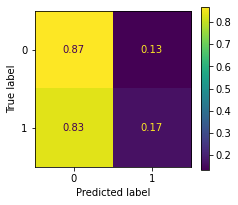

In [50]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(3.5,3))
plot_confusion_matrix(clf, X_test, y_test,normalize ='true', ax=ax)
#fig.savefig("eda-confusion-map.pdf",format='pdf', dpi=300)

### Expectancy beyond Accuracy
* With investing, what is important is not the accuracy but the expectancy
* If a person had a number of small losses, but a couple of huge wins, overall, the model could still be very profitable. 
* **Expectancy** is how much money, on average, you can expect to make or lose per dollar. 
* Let's examine whether this is our case

### Create a new dataframe with actual, prediction and correctness
* dataframe `pdf` records the actual output , prediction output () and correctness.
* Use a `lambda` function to calculate the correctness


In [51]:
df2 = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred})

In [52]:
df2['correct'] = df2.apply(lambda x: 1 if x['y_true'] == x['y_pred'] else 0, axis=1)

In [53]:
df2.tail(5)
#print(df2.tail(5).to_latex()) 

,y_true,y_pred,correct
3597,1,0,0
3598,1,0,0
3599,1,0,0
3600,0,0,1
3601,1,0,0


### Merge  the dataframe of  actual, prediction and correctness with the first-day change
* First the results data is joined with the first-day change data
* `merge` function:  implement all standard database join operations between DataFrame or named Series objects
* `left_index = True`:  use the index (row labels) from the left DataFrame or Series as its join key(s)

In [54]:
results = pd.merge(df2, df[['1st Day Open to Close $ Chg']], left_index=True, right_index=True)
results.tail(5)
#print(results.tail(5).to_latex()) 

,y_true,y_pred,correct,1st Day Open to Close $ Chg
3597,1,0,0,1.3750
3598,1,0,0,2.4375
3599,1,0,0,1.3750
3600,0,0,1,-0.6875
3601,1,0,0,2.3750


### Expectancy on buying all 200 test IPOs
* If we buy all IPO on the test data, what is the expectancy?
* Calculate the mean of  `1st Day Open to Close $ Chg` of the 200 IPOs in the test data  

In [55]:
results['1st Day Open to Close $ Chg'].mean()

1.07859375

### Expectancy on buying IPOs recommended by ML
* Only buy IPOs recommended by ML among 200 IPOs 
* Examine the mean gian on buying IPOs recommended by ML
* The average gain is improved

In [56]:
results[results['y_pred']==1]['1st Day Open to Close $ Chg'].mean()

1.690625

### What factors has the largest impact on buying? 
* Logistic regression offers predictor coefficients as the relative importance of the predictor variables
    * For categorical features, a positive sign on a feature's coefficient means this feature increases the probability of a positive outcome versus the baseline. 
    * For continuous features, a positive sign means  that an increase in the value of a feature corresponds to an increase in the probability of a positive outcome. 
    * The size of the coefficient tells us the magnitude of the increase in probability. 

In [57]:
df3 = pd.DataFrame(zip(X_train.columns, np.transpose(clf.coef_.tolist()[0])), columns=['features', 'coefficient']) # create a dataframe
df3 = df3.sort_values('coefficient', ascending=0).reset_index(drop=True) # sort data frame according to 'coefficient' values
df3 = df3.append({'features':'intercept','coefficient' : clf.intercept_.tolist()[0]}, ignore_index=True) # append a new row
df3.head(10)

,features,coefficient
0,Lead Mgr_BMO Capital Markets,1.442054
1,"Lead Mgr_C.E. Unterberg, Towbin",1.336996
2,Lead Mgr_ J.P. Morgan,1.144883
3,Lead Mgr_Joseph Gunnar,1.066812
4,Lead Mgr_Laidlaw & Company (UK) Ltd.,1.054225
5,Lead Mgr_EarlyBridCapital,1.010957
6,"Lead Mgr_Keefe, Bruyette & Woods",0.910935
7,Lead Mgr_Sandler ONeill & Partners,0.910414
8,Lead Mgr_Deutsche Banc Alex Brown,0.909036
9,Lead Mgr_Deutsche Banc Alex. Brown,0.897878


In [58]:
df3.tail(10)

,features,coefficient
354,Lead Mgr_Citi,-0.769986
355,Lead Mgr_B. Riley FBR,-0.883309
356,Lead Mgr_Chardan Capital Markets,-0.894055
357,Lead Mgr_Maxim Group LLC,-0.926583
358,Lead Mgr_Cantor,-0.937876
359,Lead Mgr_EarlyBirdCapital,-1.040040
360,Lead Mgr_Morgan Joseph,-1.193040
361,Lead Mgr_Chardan,-1.227673
362,"Lead Mgr_Keefe, Bruyette & Woods (A Stifel Com...",-1.240262
363,intercept,-0.817420


## Summary
* Apply CRISP-DM to the real-world IPO data 
* Understanding business
    * identify business purpose of this IPO project 
* Data understading and prepareion 
    * Read Excel spreadsheet through `xlrd` library
    * Convert float dates into the normal date format 
    * EDA of the IPO market
    * Data cleansing (drop penny IPO) 
    * Feature engineering (add new features) 
    * Dummy encoding of categorical features using `patsy` library
* Model building
    * Binary classification with logistic regression
* Model evaluation:
    * based on Expectancy rather than accuracy